In [29]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [30]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="darkgrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [10, 5]})

In [32]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize']=(14,5)
import seaborn as sns
import seaborn as sb
sb.set()
plt.style.use('dark_background')
%matplotlib inline

In [33]:
ticker = ['AMD']
start = datetime.datetime(2023,11, 1)
end = datetime.datetime(2024,11, 1)
df = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [34]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,98.580002,108.150002,98.500000,108.040001,108.040001,138641500
2023-11-02,107.959999,109.410004,105.910004,107.830002,107.830002,71377000
2023-11-03,109.050003,113.389999,107.860001,112.250000,112.250000,65576600
2023-11-06,112.599998,113.080002,110.220001,111.750000,111.750000,49270400
2023-11-07,111.860001,114.650002,111.220001,113.449997,113.449997,50550200
...,...,...,...,...,...,...
2024-10-25,155.399994,158.910004,155.050003,156.229996,156.229996,29758500
2024-10-28,158.500000,160.279999,157.039993,159.919998,159.919998,36010100
2024-10-29,161.100006,167.509995,158.940002,166.250000,166.250000,71896000


In [35]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [36]:
df['Close'].iplot()

In [37]:
fig_price=px.line(df['Close'], title='Price of MSFT')
fig_price.show()

In [38]:
#We create a function to calculate the Simple Moving Average (SMA)

def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [39]:
df['SMA']=SMA(df,21)
df['Simple_Returns']=df.pct_change(1)['Close']
df['Log_Returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['Close']/df['SMA']

In [40]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
Date,,,,,,,,,,
2023-11-01,98.580002,108.150002,98.500000,108.040001,108.040001,138641500,NaN,NaN,NaN,NaN
2023-11-02,107.959999,109.410004,105.910004,107.830002,107.830002,71377000,NaN,-0.001944,-0.001946,NaN
2023-11-03,109.050003,113.389999,107.860001,112.250000,112.250000,65576600,NaN,0.040990,0.040173,NaN
2023-11-06,112.599998,113.080002,110.220001,111.750000,111.750000,49270400,NaN,-0.004454,-0.004464,NaN
2023-11-07,111.860001,114.650002,111.220001,113.449997,113.449997,50550200,NaN,0.015213,0.015098,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-10-25,155.399994,158.910004,155.050003,156.229996,156.229996,29758500,161.590477,0.018183,0.018020,0.966827
2024-10-28,158.500000,160.279999,157.039993,159.919998,159.919998,36010100,161.379524,0.023619,0.023344,0.990956
2024-10-29,161.100006,167.509995,158.940002,166.250000,166.250000,71896000,161.482857,0.039582,0.038819,1.029521


In [41]:
df['Ratios'].describe()

count    232.000000
mean       1.012813
std        0.076547
min        0.830530
25%        0.955691
50%        1.019225
75%        1.068262
max        1.186530
Name: Ratios, dtype: float64

In [42]:
#We set and show the percentile values

percentiles=[15,20,50,80,85]

In [43]:
#We remove NAN values en the Ratios Column

ratios=df['Ratios'].dropna()

In [44]:
#We get the values of the percentiles

percentile_values=np.percentile(ratios, percentiles)

In [45]:
#We show the values of the percentiles

percentile_values

array([0.93142869, 0.94370132, 1.0192247 , 1.08623986, 1.09715846])

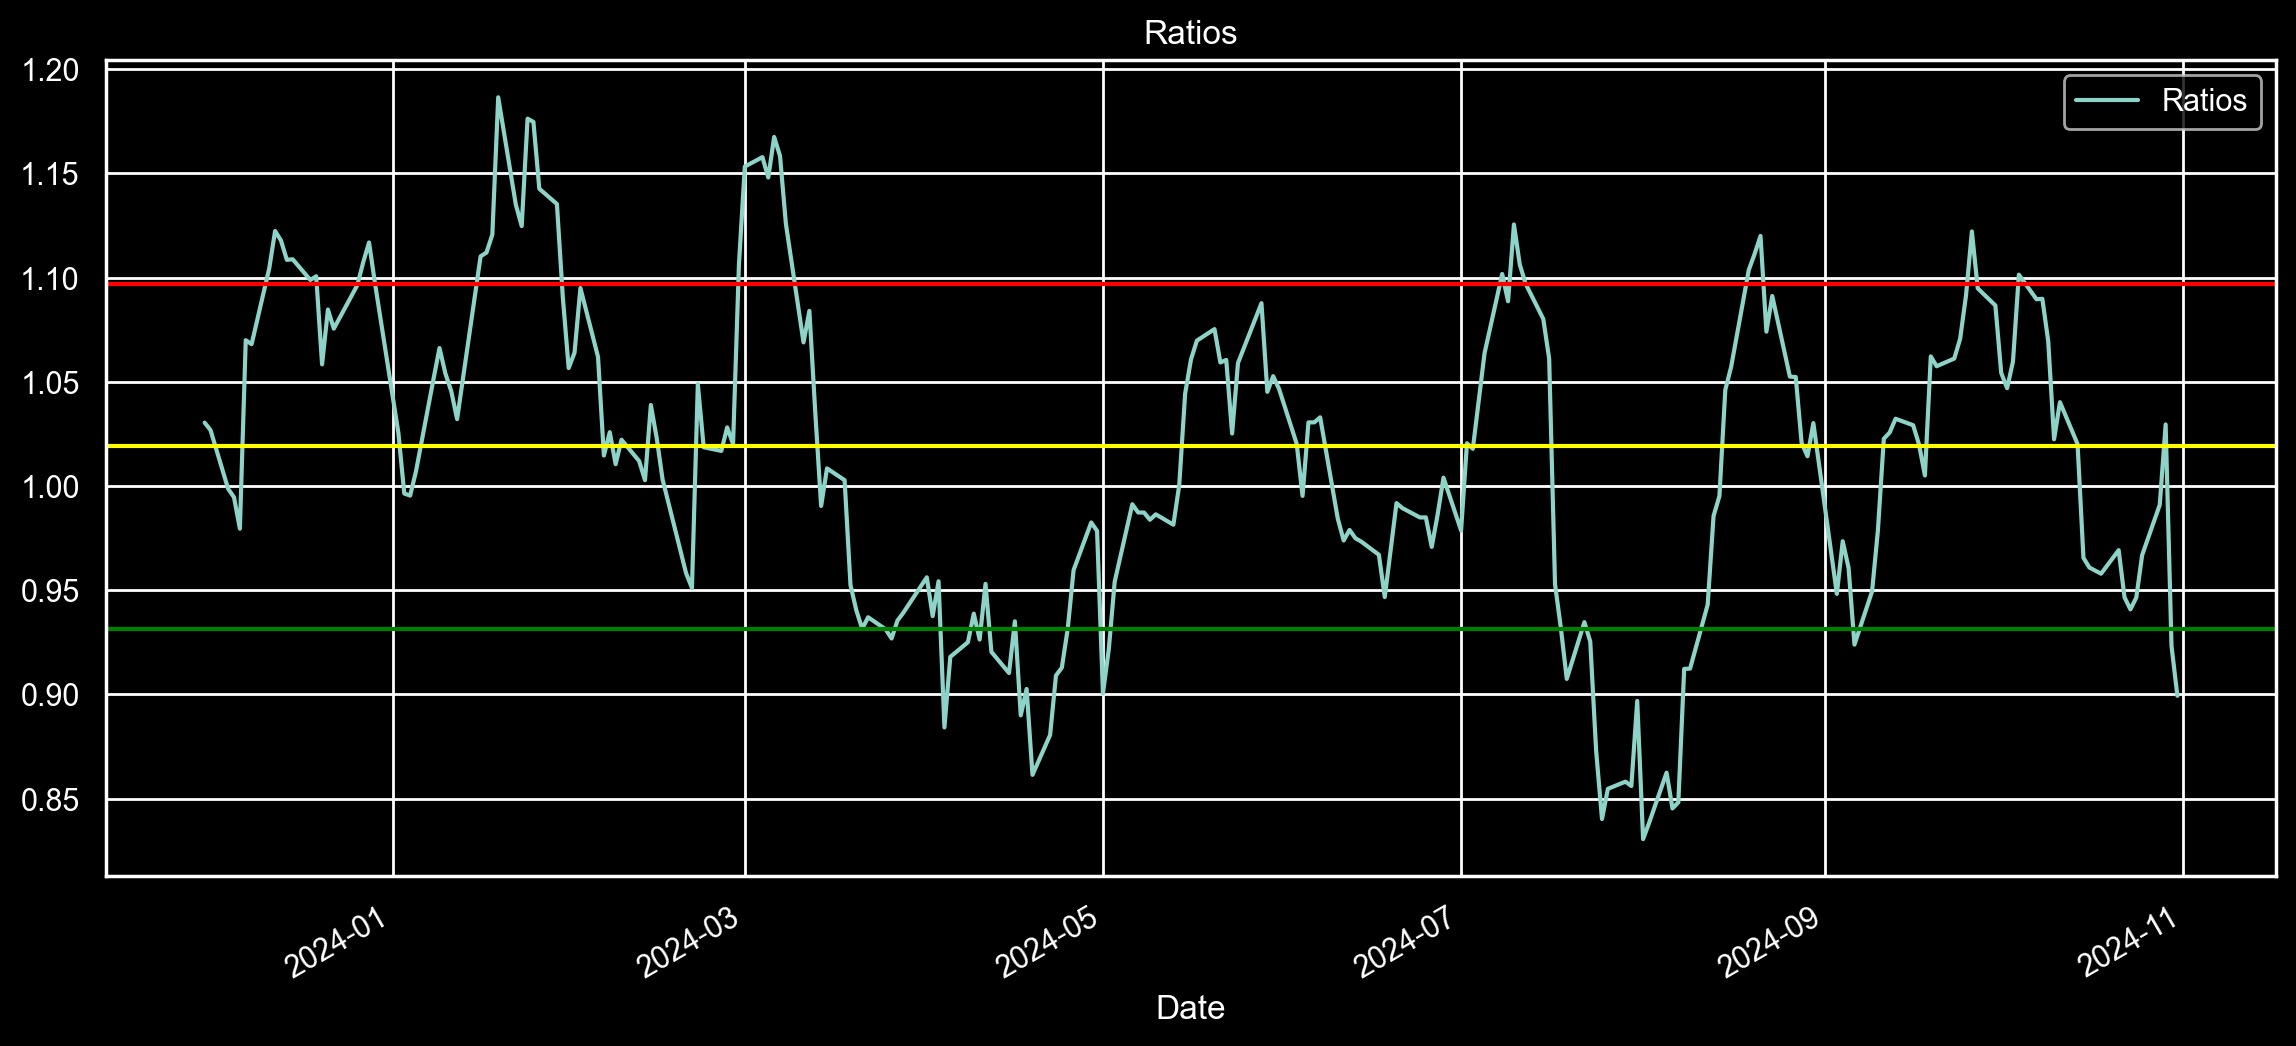

In [46]:
#We plot the ratios

plt.figure(figsize=(14,6))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[0], c='green', label='15th percentile')
plt.axhline(percentile_values[2], c='yellow', label='50th percentile')
plt.axhline(percentile_values[-1], c='red', label='85th percentile')

In [47]:
#We create buy and sell signals for the strategy

sell=percentile_values[-1]    #The 85th percentile threshold where we want to sell
buy=percentile_values[0]      #The 15th percentile threshold whre we want to buy.


In [48]:
#we put a -1 where the ratio is greater than the percentile to sell and NAN otherwise

df['Positions']=np.where(df.Ratios > sell, -1, np.nan)

In [49]:
#we put a 1 where the ratio is less than the percentile to buy and put the current value otherwise

df['Positions']=np.where(df.Ratios < buy, 1, df['Positions'])

In [50]:
#We use ffill to fill the missing values in the dataframe. ffill stands for forward fill

df['Positions']=df['Positions'].ffill()

In [51]:
#we get the buy and sell signals

df['Buy']=np.where(df.Positions==1, df['Close'], np.nan)
df['Sell']=np.where(df.Positions==-1, df['Close'], np.nan)

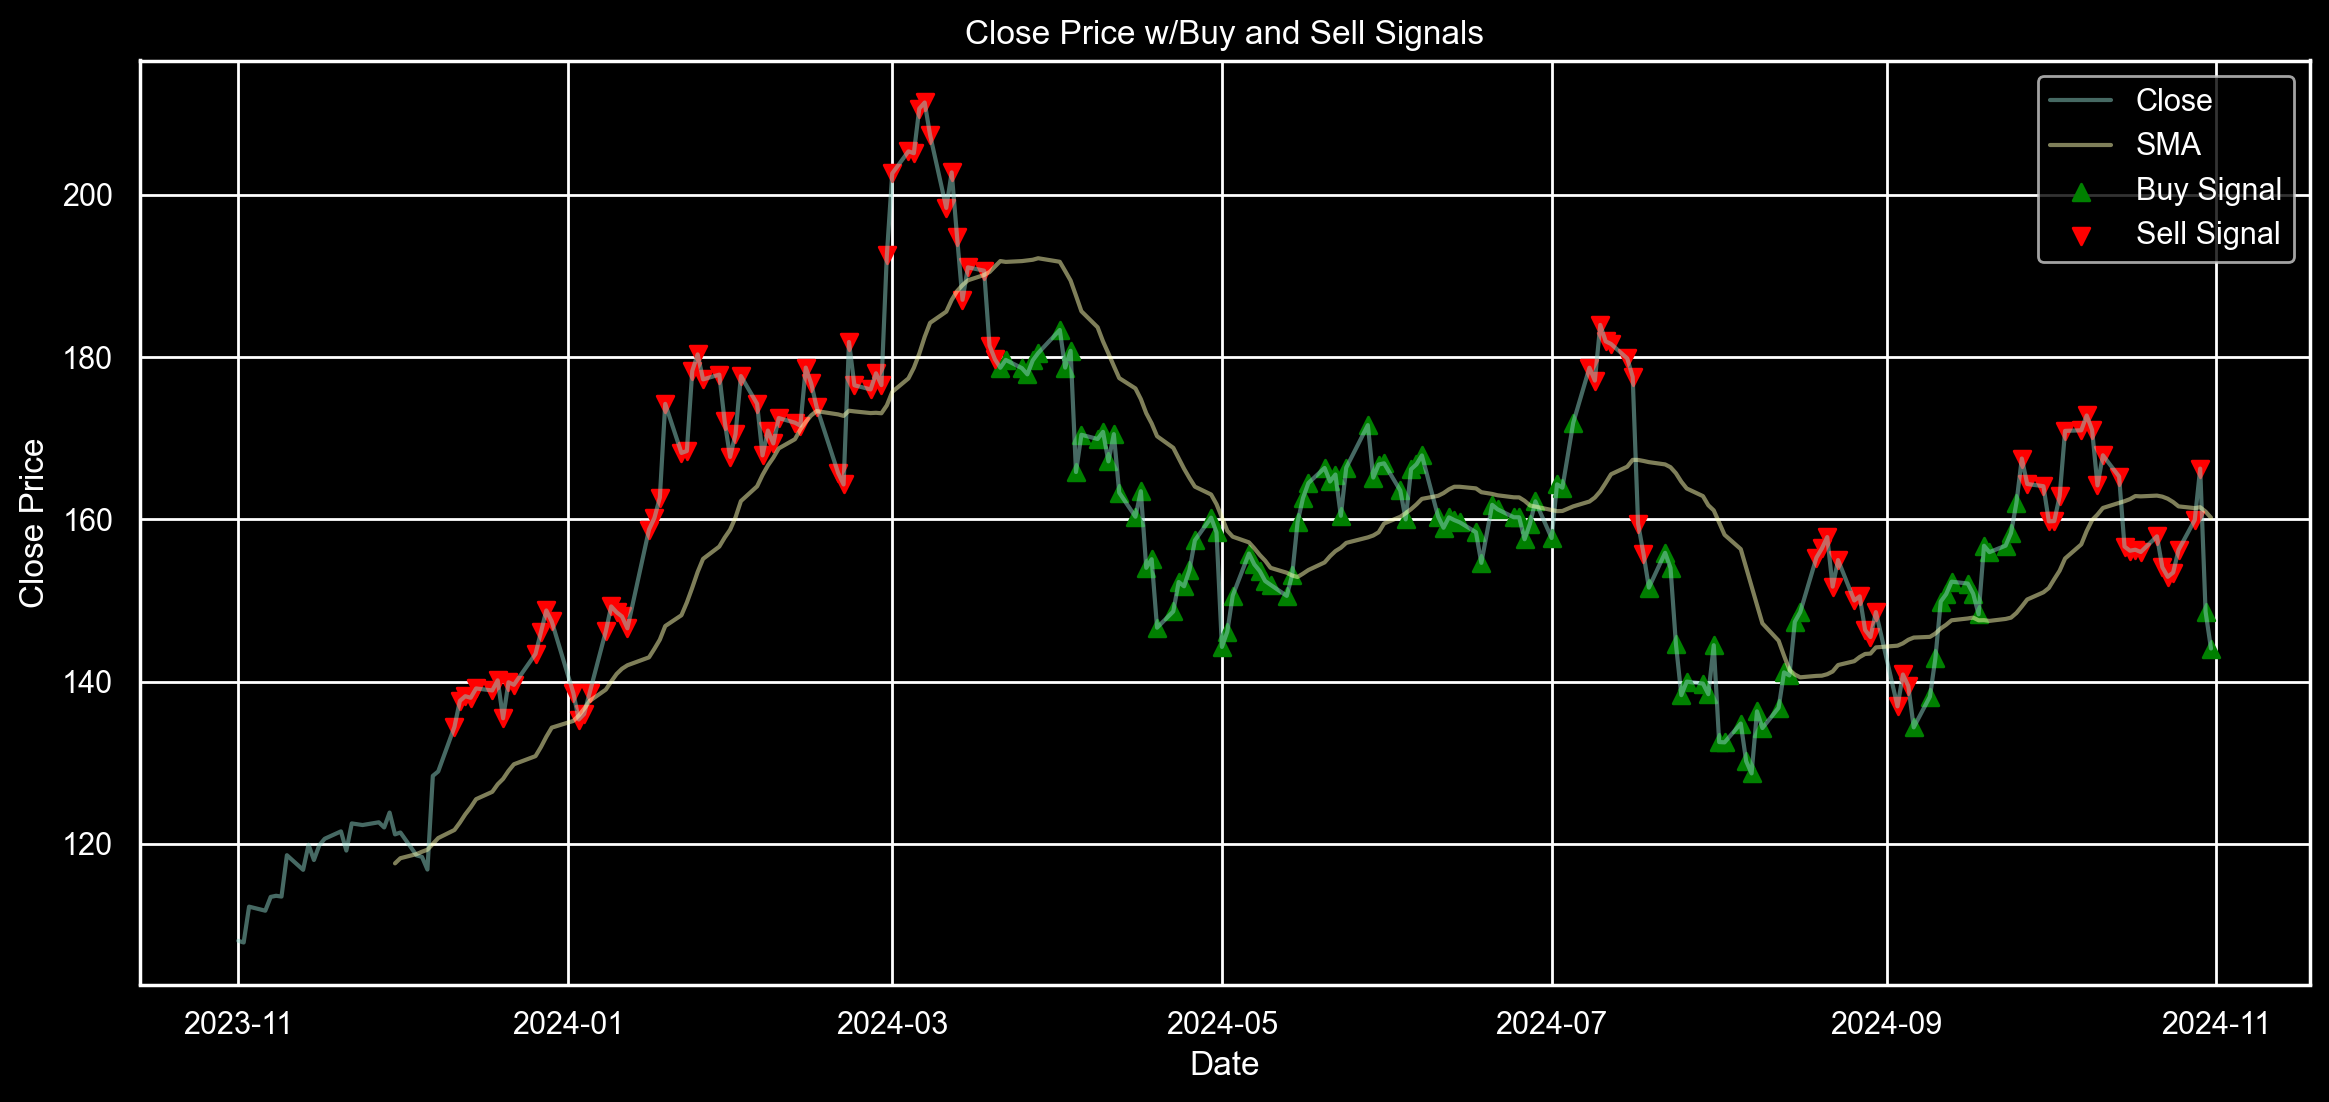

In [52]:
#We visualize the buy and sell signlas along with the close price

plt.figure(figsize=(14,6))
plt.title('Close Price w/Buy and Sell Signals')
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA'], alpha=0.5, label='SMA')
plt.scatter(df.index,df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(df.index,df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [53]:
#We calculate the returns for the Mean Reversion Strategy

df['Strategy_Returns']=df.Positions.shift(1)*df.Log_Returns

In [54]:
df['Strategy_Returns']

Date
2023-11-01         NaN
2023-11-02         NaN
2023-11-03         NaN
2023-11-06         NaN
2023-11-07         NaN
                ...   
2024-10-25   -0.018020
2024-10-28   -0.023344
2024-10-29   -0.038819
2024-10-30    0.112235
2024-10-31   -0.030959
Name: Strategy_Returns, Length: 252, dtype: float64

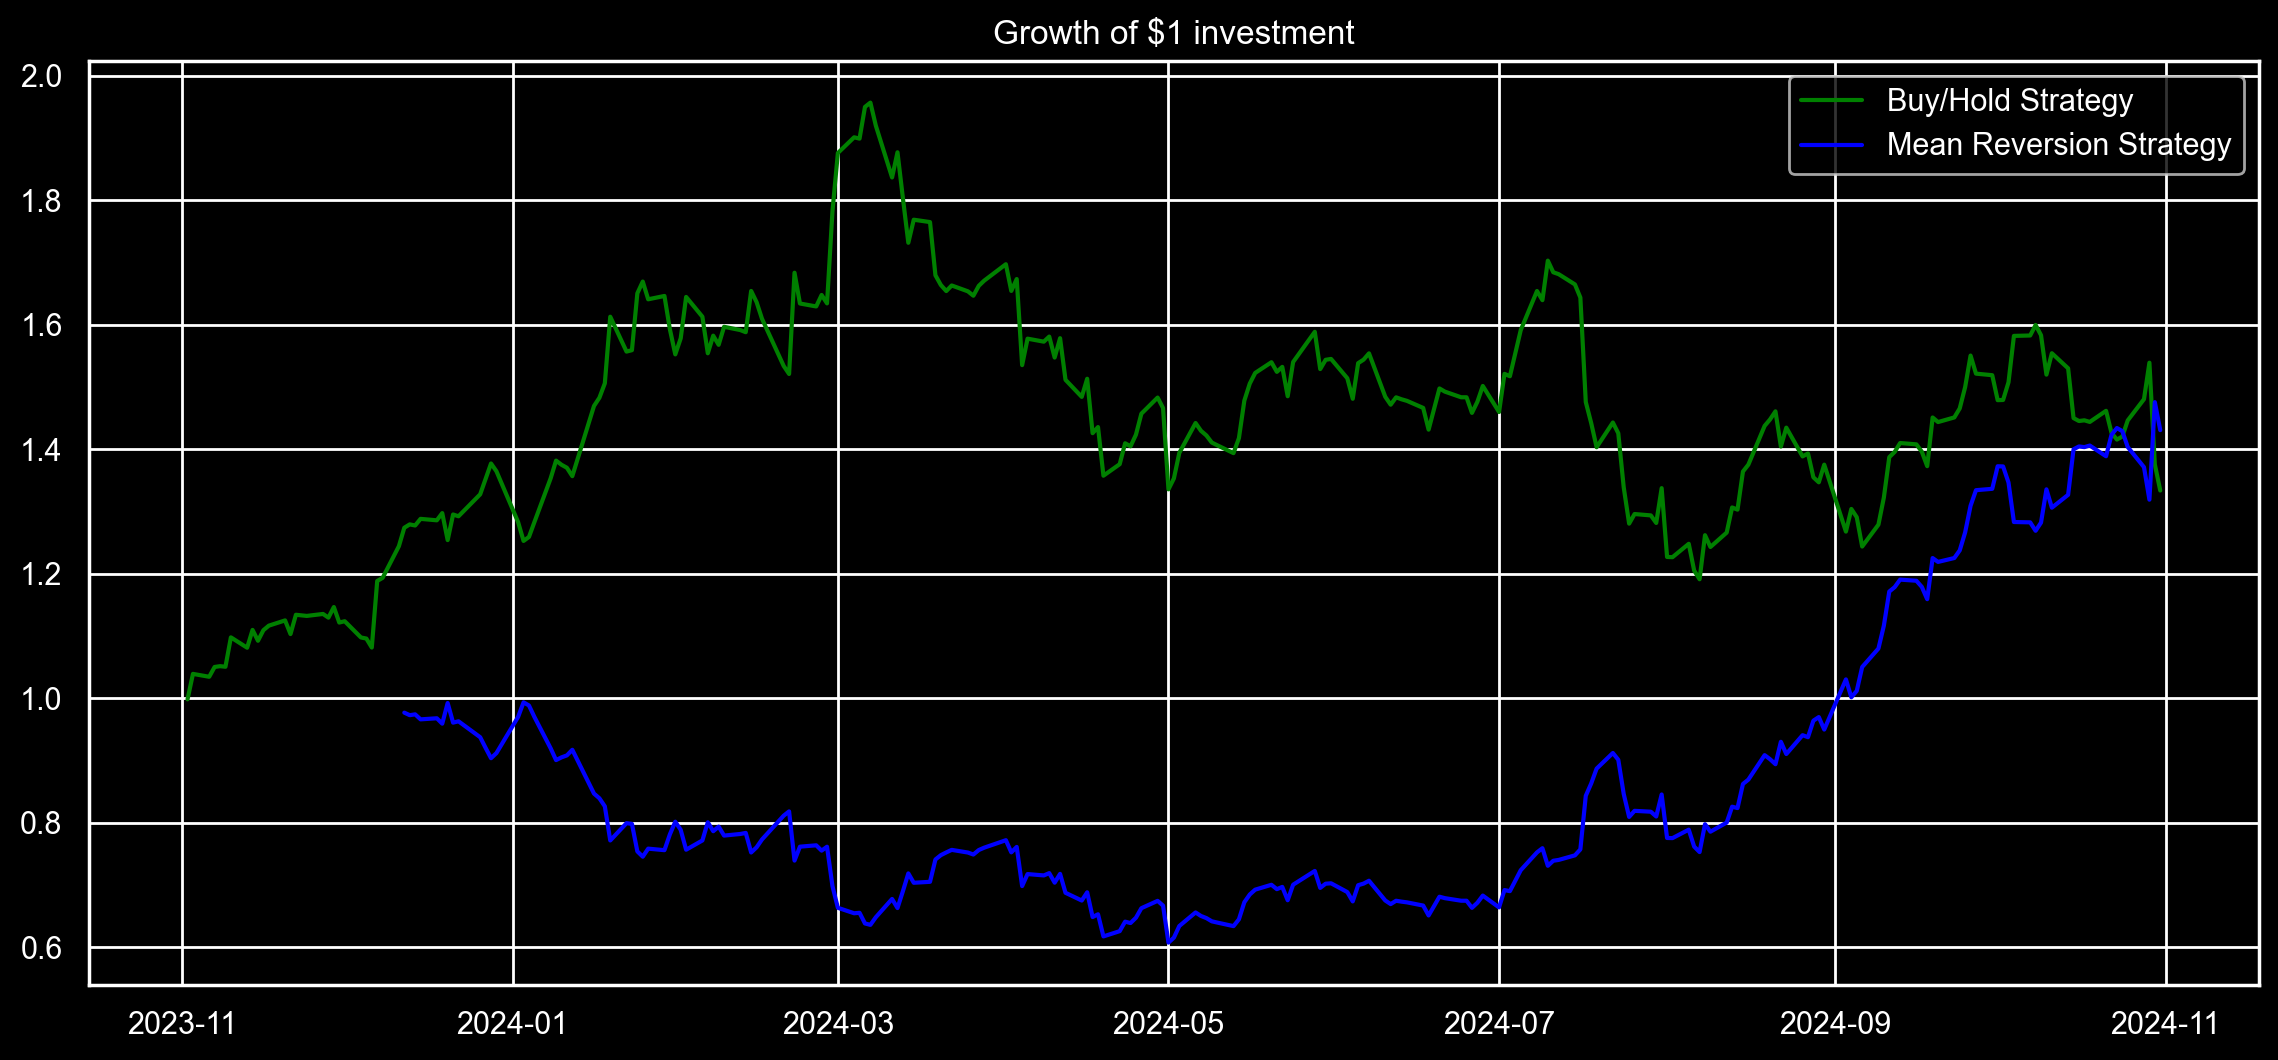

In [55]:
#We plot the cumulative log returns and the cumulative Mean Reversion Strategy

plt.figure(figsize=(14,6))
plt.title('Growth of $1 investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c='green', label='Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c='blue', label='Mean Reversion Strategy')
plt.legend()

In [56]:
#We print returns for both strategies

print('Buy and Hold Strategy Returns: ', np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1)
print('Mean Reversion Strategy Returns: ', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)

Buy and Hold Strategy Returns:  0.3334876536780287
Mean Reversion Strategy Returns:  0.4304273614856555
